In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_1_imputed.csv", index_col=0)

In [36]:
# Normalize the data in base_df to get a new dataframe called norm_df
norm_df = (base_df - base_df.mean()) / base_df.std()

In [37]:
print(norm_df)

        score    salary  happiness       Age    cluster
0    1.080107  0.634338   0.350921  0.684045  -0.071575
1   -0.069911  0.324936   0.993476  1.196730  -0.071575
2    0.243730 -0.406481  -0.359272  0.968870  -0.071575
3   -0.418402 -0.696523  -1.001827 -1.309730  -0.071575
4    0.731617 -0.210791  -0.325453  1.538520  -0.071575
..        ...       ...        ...       ...        ...
975 -1.463874 -0.015580  -0.325453  0.741010  -0.071575
976 -0.801742 -0.733209  -0.359272 -1.594555  -0.071575
977  0.034636  0.080328  -0.325453 -0.569185  13.957114
978 -0.244157  4.692847   1.027295  1.652450  -0.071575
979  0.069485  0.130510   0.317102 -0.910975  -0.071575

[980 rows x 5 columns]


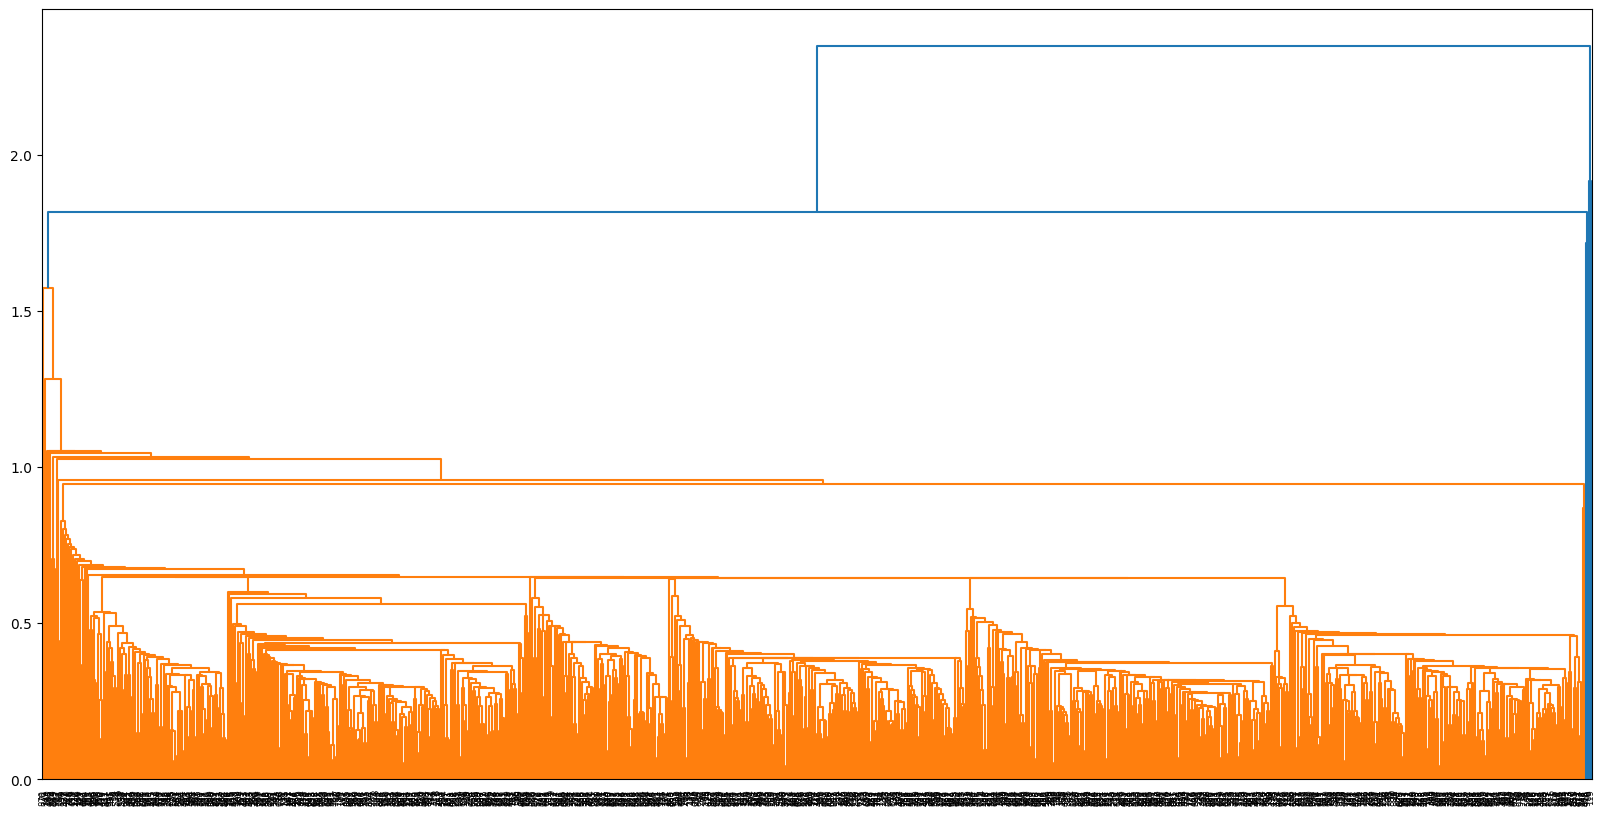

In [48]:
# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(norm_df, method='single')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20, 10))
dendrogram(mergings,
           labels=base_df.index,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [49]:
# Cut the dendrogram at the height that results in 2 clusters
# And assign the cluster labels to the original dataframe in the column 'cluster'
from scipy.cluster.hierarchy import fcluster

norm_df['cluster'] = fcluster(mergings, 2, criterion='maxclust')
norm_df

,score,salary,happiness,Age,cluster
0,1.080107,0.634338,0.350921,0.684045,1
1,-0.069911,0.324936,0.993476,1.196730,1
2,0.243730,-0.406481,-0.359272,0.968870,1
3,-0.418402,-0.696523,-1.001827,-1.309730,1
4,0.731617,-0.210791,-0.325453,1.538520,1
...,...,...,...,...,...
975,-1.463874,-0.015580,-0.325453,0.741010,1
976,-0.801742,-0.733209,-0.359272,-1.594555,1
977,0.034636,0.080328,-0.325453,-0.569185,1
978,-0.244157,4.692847,1.027295,1.652450,1


In [50]:
# Show the lines of the outlier cluster
outlier_cluster = norm_df[norm_df['cluster'] == 2]
outlier_cluster

,score,salary,happiness,Age,cluster
99,0.034636,6.050802,1.66985,-1.42366,2
119,-1.463874,5.699435,1.66985,-0.28436,2


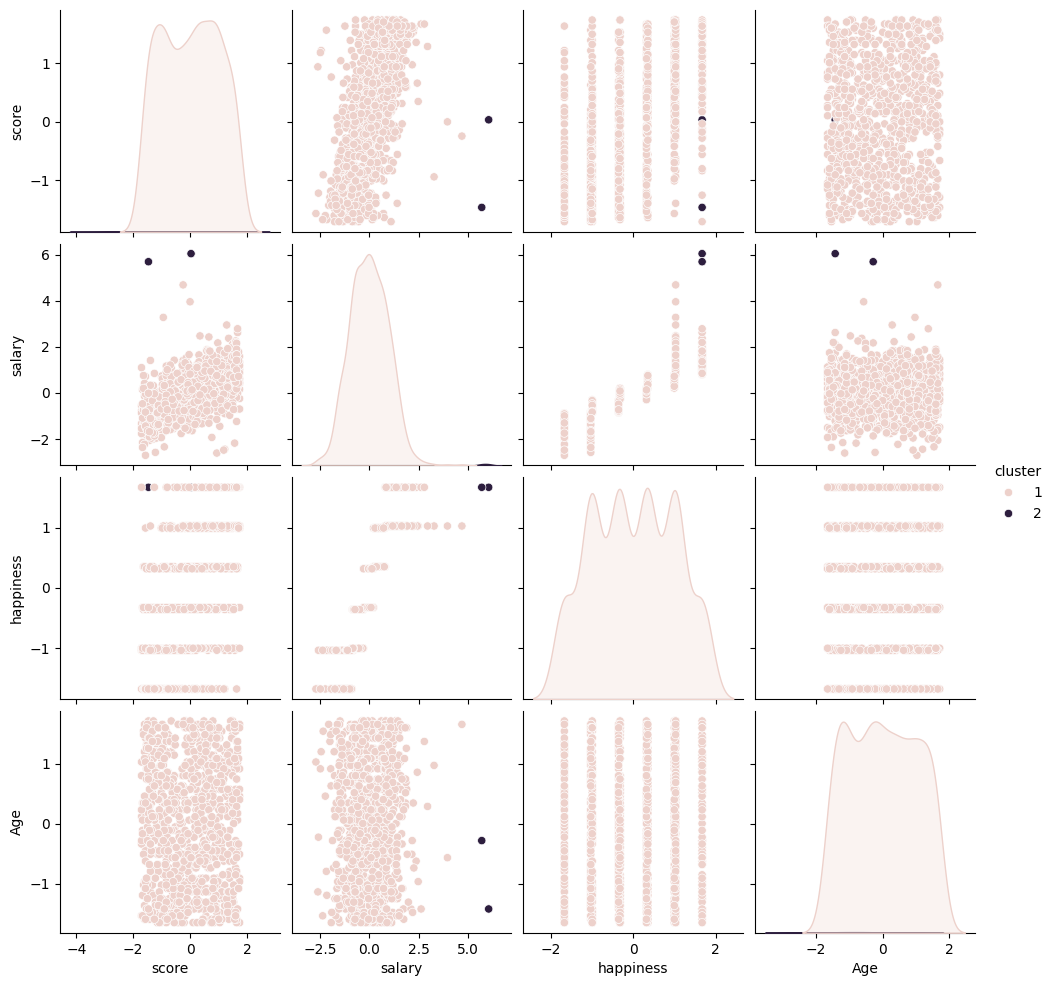

In [51]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

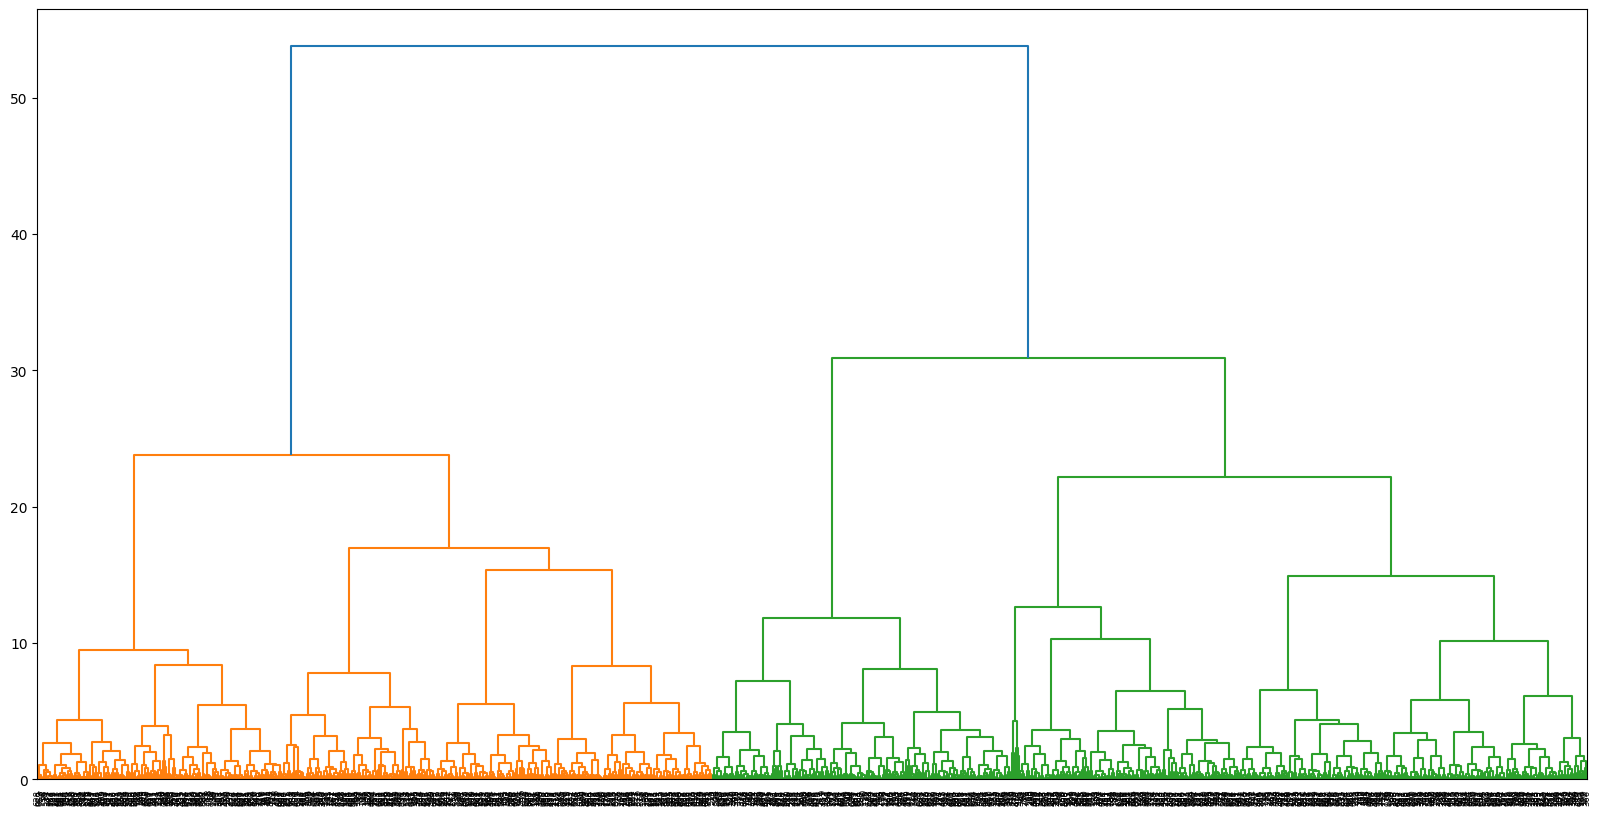

In [52]:
# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(norm_df, method='ward')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20, 10))
dendrogram(mergings,
           labels=base_df.index,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [53]:
# Cut the dendrogram at the height that results in 2 clusters
# And assign the cluster labels to the original dataframe in the column 'cluster'
from scipy.cluster.hierarchy import fcluster

norm_df['cluster'] = fcluster(mergings, 2, criterion='maxclust')
norm_df

,score,salary,happiness,Age,cluster
0,1.080107,0.634338,0.350921,0.684045,2
1,-0.069911,0.324936,0.993476,1.196730,2
2,0.243730,-0.406481,-0.359272,0.968870,1
3,-0.418402,-0.696523,-1.001827,-1.309730,1
4,0.731617,-0.210791,-0.325453,1.538520,1
...,...,...,...,...,...
975,-1.463874,-0.015580,-0.325453,0.741010,1
976,-0.801742,-0.733209,-0.359272,-1.594555,2
977,0.034636,0.080328,-0.325453,-0.569185,2
978,-0.244157,4.692847,1.027295,1.652450,2


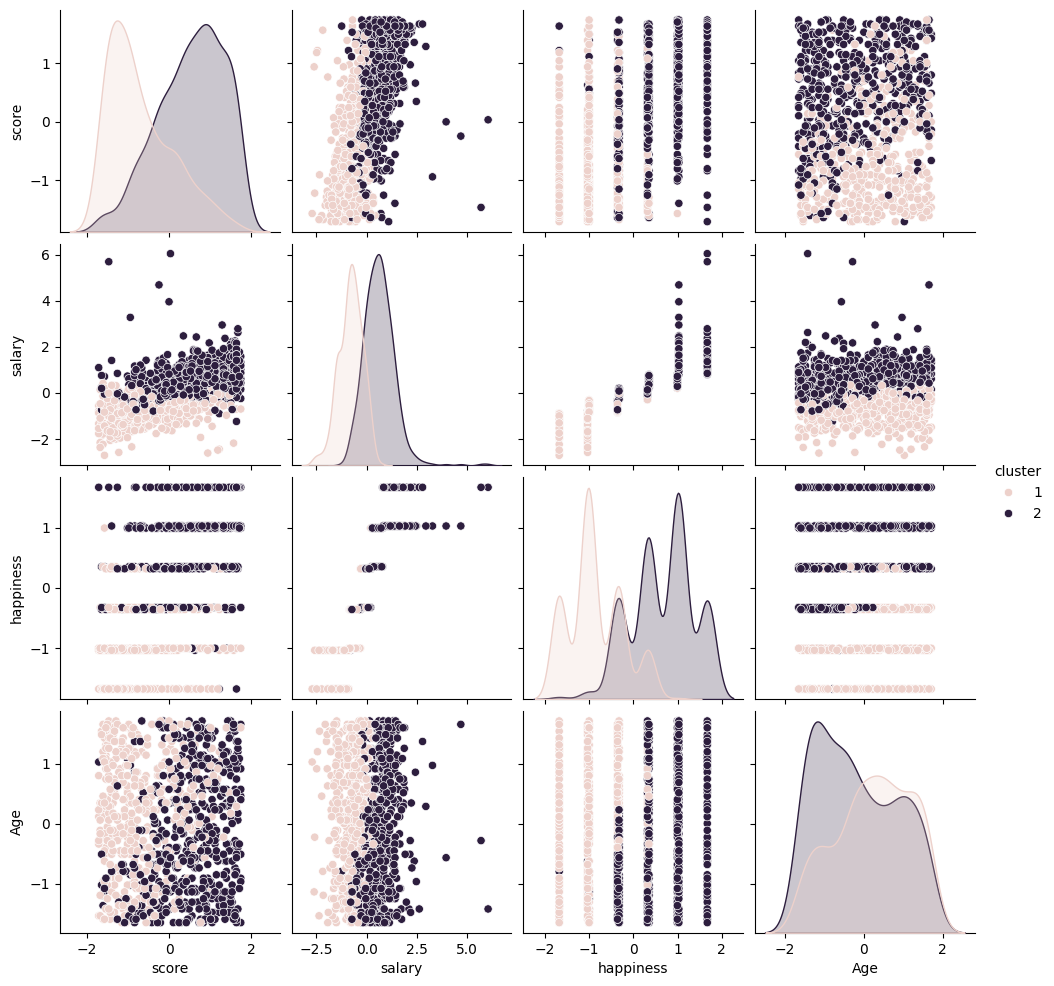

In [54]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

In [55]:
# KMeans clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(norm_df)
labels = model.predict(norm_df)
norm_df['cluster'] = labels

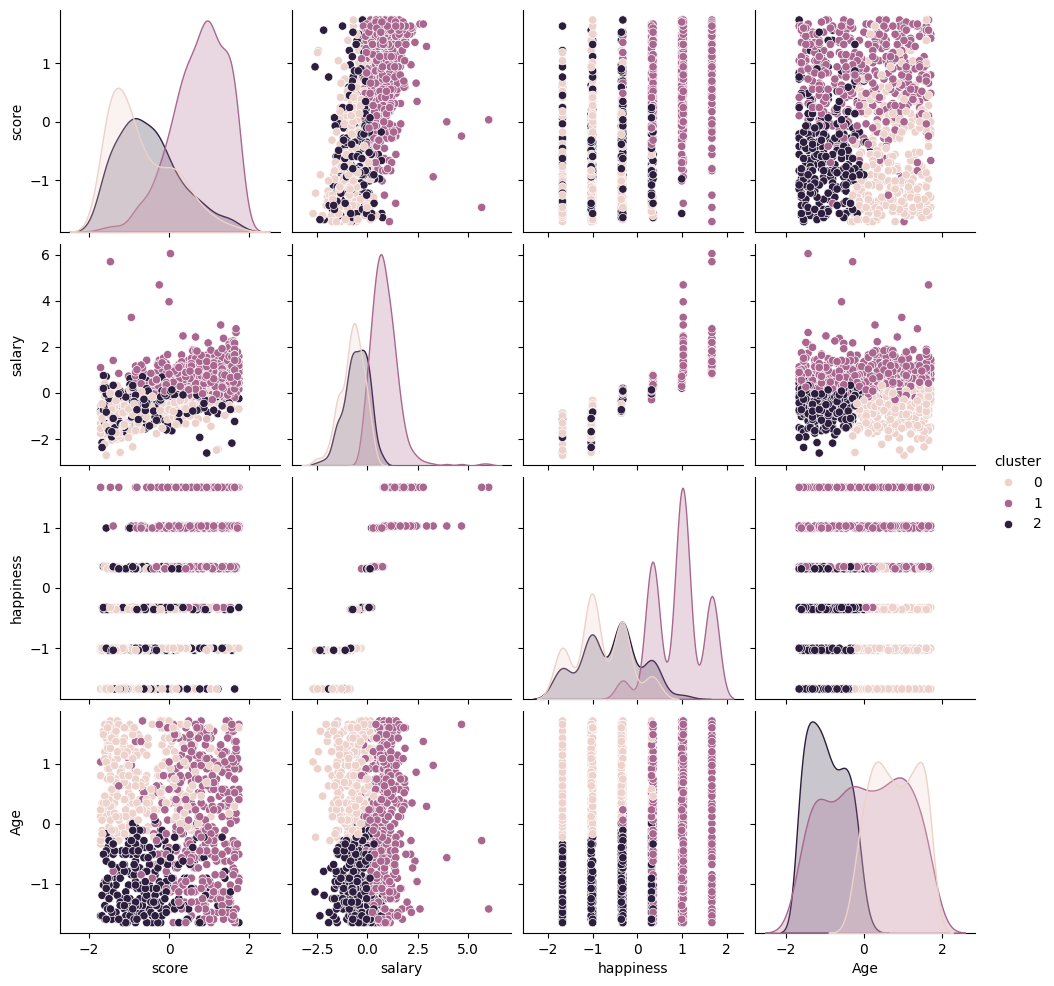

In [57]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

In [58]:
model = KMeans(n_clusters=2)
model.fit(norm_df)
labels = model.predict(norm_df)
norm_df['cluster'] = labels

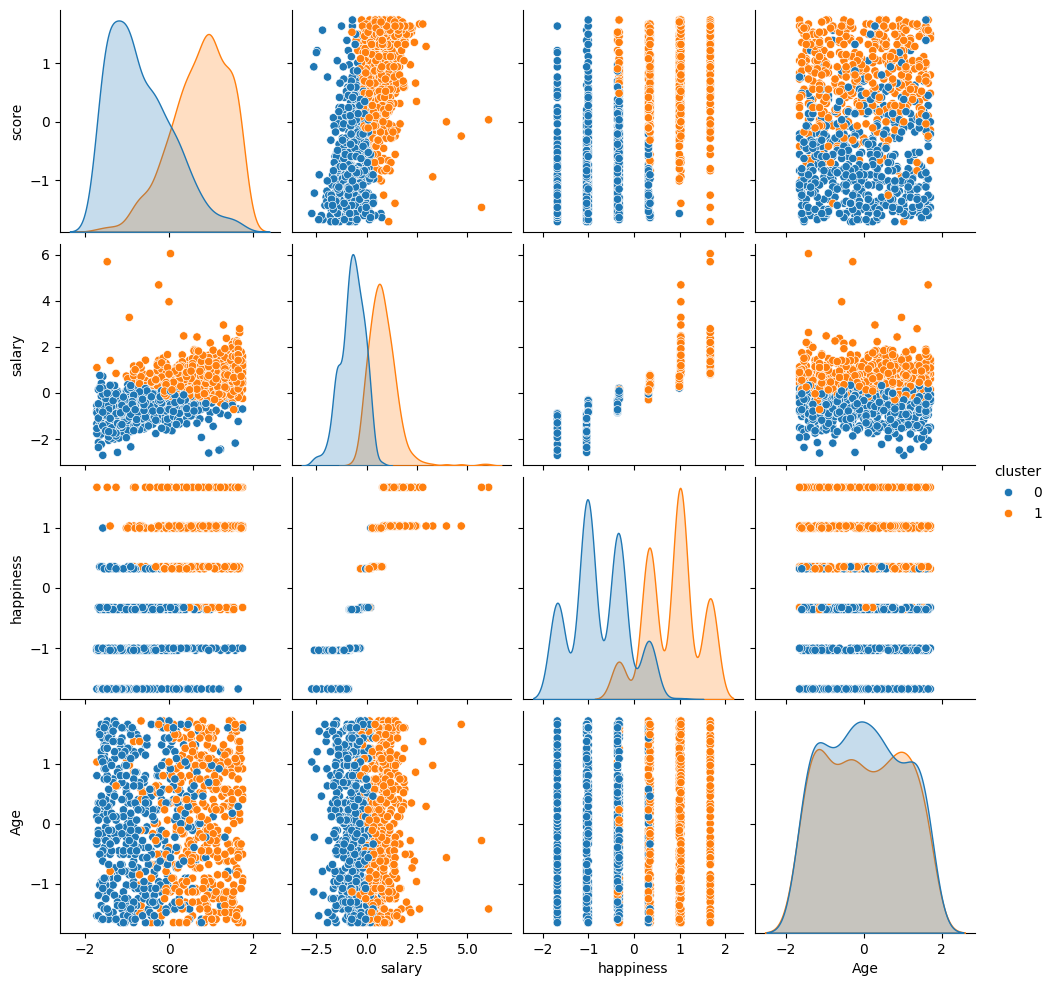

In [59]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

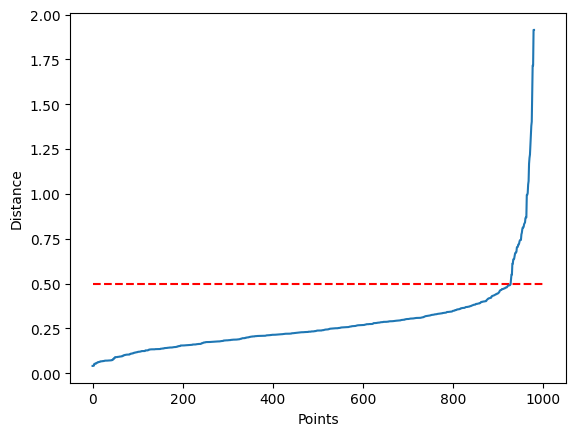

In [73]:
# Create a sorted k-dist graph
from sklearn.neighbors import NearestNeighbors

# Fit the k-nearest neighbors model to the data
knn = NearestNeighbors(n_neighbors=4)
knn.fit(norm_df)

# Compute the distances between each point and its four nearest neighbors
distances, indices = knn.kneighbors(norm_df)

# Sort the distance matrix
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot a horizontal line at distance 0.5
plt.hlines(0.5, 0, 1000, colors='r', linestyles='--')

# Plot the sorted distances
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [68]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

# Choose k=4 according to rule of thumb
# And eps=0.5 according to the sorted k-dist graph
model = DBSCAN(eps=0.5, min_samples=4)
model.fit(norm_df)
labels = model.labels_
norm_df['cluster'] = labels

In [78]:
# How many clusters are there?
print(norm_df['cluster'].nunique())

# How many points are there per cluster?
print(norm_df['cluster'].value_counts())

15
cluster
 0     185
 1     181
 2     177
 3     176
-1      86
 8      68
 6      40
 7      32
 9      10
 5       8
 4       4
 12      4
 11      4
 13      3
 10      2
Name: count, dtype: int64


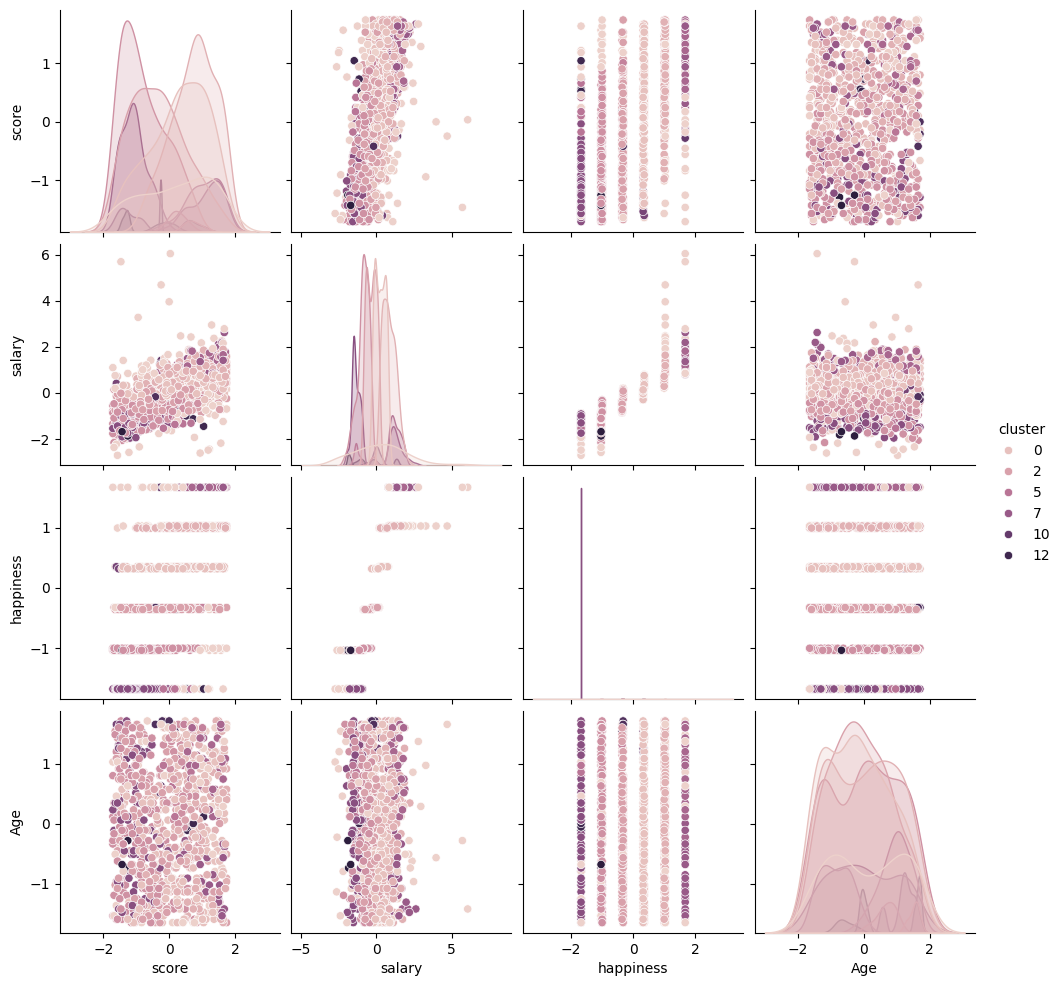

In [71]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()